Importieren erforderlicher Bibliotheken

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

Datenimport

In [32]:
from google.colab import auth # Wenn es Probleme mit Authentiction gibt
auth.authenticate_user()

In [33]:
from google.colab import drive #Wir betten unsere Google Drive ein
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!dir 'drive/MyDrive/Colab Notebooks' # Wo gibt es unsere Files

DS\ Fitness\ Projekt.ipynb  Steps.csv


In [35]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Steps.csv") #Auslesen der Daten

In [36]:
df.head() # Übersicht über mehrere Datensätze aus einem Datenframe

,Date,Step Count,Distance Travelled,Active Time,Flights Climbed,Goal,Percentage of Goal Completed,Calories
0,3/17/2021,1500,1.02 km,23:14 min,3,10000,15%,64
1,3/18/2021,3165,2.23 km,44:56 min,2,10000,32%,134
2,3/19/2021,1494,1.08 km,24:51 min,0,10000,15%,68
3,3/20/2021,1808,1.27 km,30:04 min,1,10000,18%,81
4,3/21/2021,2667,1.78 km,30:57 min,3,10000,27%,103


In [37]:
df = df.drop(columns=['Flights Climbed', 'Goal', "Percentage of Goal Completed"]) # entfernen leerer und nicht nötige Spalten

In [38]:
print(df.columns) # checken welche Spalten es gibt (um richtige Namen zu schreiben)

Index(['Date', 'Step Count', 'Distance Travelled', 'Active Time', 'Calories'], dtype='object')


In [39]:
df.head() # checken wie neues Dataframe aussieht

,Date,Step Count,Distance Travelled,Active Time,Calories
0,3/17/2021,1500,1.02 km,23:14 min,64
1,3/18/2021,3165,2.23 km,44:56 min,134
2,3/19/2021,1494,1.08 km,24:51 min,68
3,3/20/2021,1808,1.27 km,30:04 min,81
4,3/21/2021,2667,1.78 km,30:57 min,103


Überprüfung der Datenstruktur

In [40]:
df.info(verbose = True, show_counts=True) #checken welche Datatypes gibt es in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                526 non-null    object
 1   Step Count          526 non-null    int64 
 2   Distance Travelled  526 non-null    object
 3   Active Time         526 non-null    object
 4   Calories            526 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 20.7+ KB


In [41]:
df.shape

(526, 5)

In [42]:
df.value_counts()

,,,,,count
Date,Step Count,Distance Travelled,Active Time,Calories,
1/1/2022,3119,2.27 km,57:37 min,150,1
7/15/2021,145,0.11 km,1:37 hr,172,1
7/14/2021,7842,6.19 km,1:19 hr,365,1
7/13/2022,96,0.07 km,1:34 min,4,1
7/13/2021,22,0.02 km,1:25 hr,151,1
...,...,...,...,...,...
3/25/2021,2566,1.87 km,38:38 min,113,1
3/24/2022,2921,2.09 km,48:08 min,132,1
3/24/2021,779,0.58 km,13:08 min,36,1


Es gibt 526 Reihen und 5 Spalten.

In [43]:
df.describe() #Statistischer Bericht für numerische Variablen


,Step Count,Calories
count,526.00,526.00
mean,3174.40,142.87
std,2680.44,117.17
min,0.00,0.00
25%,1296.75,60.00
50%,2366.50,108.00
75%,4369.75,191.00
max,12432.00,595.00


In [44]:
df.isnull().values.any() # Keine fehlenden Werte


False

Analyse kategorialer Variablen

In [45]:
df.select_dtypes(include = "object").columns

Index(['Date', 'Distance Travelled', 'Active Time'], dtype='object')

In [46]:
len(df.select_dtypes(include = "object").columns) #Überprüfen der Anzahl der kategorialen Variablen

3

Die Daten enthalten 3 categorical Variablen

Numerische Variablenanalyse

In [47]:
number_df = df.select_dtypes(include="number")

In [48]:
number_df.columns

Index(['Step Count', 'Calories'], dtype='object')

In [49]:
len(number_df.columns) # Überprüfen der Anzahl der numerischen Variablen

2

Die Daten enthalten 2 numerical Variablen

Umgang mit fehlenden Werten

In [50]:
df.isnull().values.any() # Keine fehlenden Werte


False

In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y') # Datumskonvertierung

In [52]:
df['Distance Travelled'] = df['Distance Travelled'].str.replace(' km', '').astype(float) # Entfernungskonventierung

In [53]:
def convert_active_time(active_time):   # # Funktion zur Zeitumrechnung
    active_time = active_time.strip()  # Entfernen unnötiger Leerzeichen
    if 'hr' in active_time:
        #  Verarbeitung von Format "Stunden.Minuten hr" oder "Stunden:Minuten hr"
        active_time = active_time.replace(' hr', '')
        if ':' in active_time:
            hours, minutes = map(float, active_time.split(':'))
        else:
            hours, minutes = map(float, active_time.split('.'))
        return hours * 60 + minutes  # In Minuten umrechnen
    elif 'min' in active_time:
        #  Verarbeitung von Format "Minuten:Sekunden min" oder "Minuten min"
        if ':' in active_time:
            parts = active_time.replace(' min', '').split(':')
            minutes = float(parts[0])  # Anzahl der Minuten
            seconds = float(parts[1]) if len(parts) > 1 else 0  # Anzahl der Sekunden, falls angegeben
            return minutes + seconds / 60  # In Minuten umrechnen
        else:
            # Wenn Format nur "Minuten min" ist
            return float(active_time.replace(' min', ''))
    return 0  # Falls Format ist unbekannt

In [54]:
df['active_time'] = df['Active Time'].apply(convert_active_time) # Verwenden von der Funktion

In [55]:
df.info(verbose = True, show_counts=True) #checken welche Datatypes gibt es in df nach den Änderungen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                526 non-null    datetime64[ns]
 1   Step Count          526 non-null    int64         
 2   Distance Travelled  526 non-null    float64       
 3   Active Time         526 non-null    object        
 4   Calories            526 non-null    int64         
 5   active_time         526 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 24.8+ KB


Korrelation:

In [56]:
correlation_matrix = df[['Step Count', 'Calories', 'active_time', 'Distance Travelled']].corr()
print(correlation_matrix)

                    Step Count  Calories  active_time  Distance Travelled
Step Count                1.00      0.98         0.92                1.00
Calories                  0.98      1.00         0.96                0.98
active_time               0.92      0.96         1.00                0.91
Distance Travelled        1.00      0.98         0.91                1.00


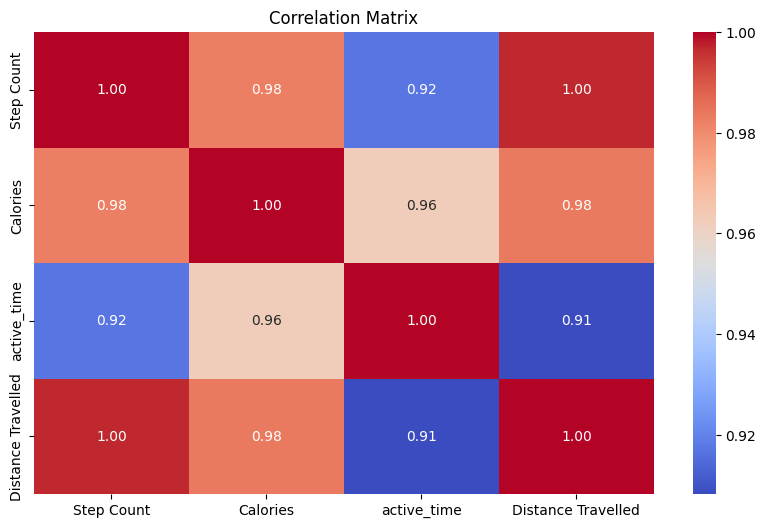

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Auf der Suche nach Korrelationen

In [58]:
corr_matrix = df.corr(numeric_only=True)

In [59]:
corr_matrix["Step Count"].sort_values(ascending=False)

,Step Count
Step Count,1.00
Distance Travelled,1.00
Calories,0.98
active_time,0.92


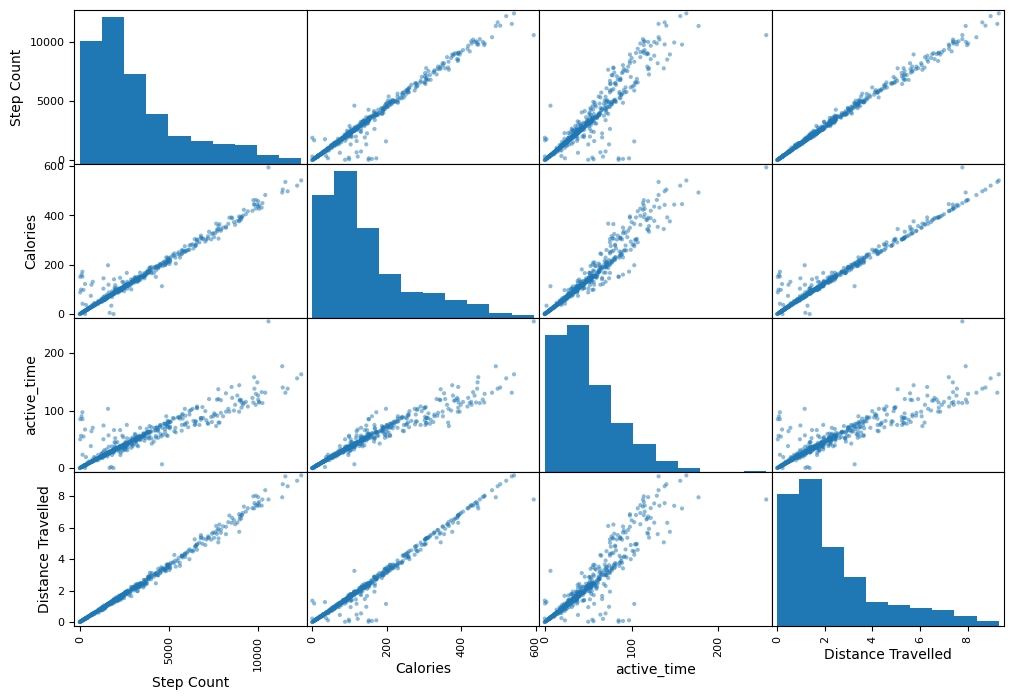

In [60]:
from pandas.plotting import scatter_matrix

attributes = ["Step Count", "Calories", "active_time",
              "Distance Travelled"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [61]:
# Konvertierung der Spalte mit dem Datum
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
# Hinzufügen von Spalten für Monat, Wochentag und Jahreszeit
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

In [63]:
# Funktion zur Bestimmung der Jahreszeit
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Frühling'
    elif month in [6, 7, 8]:
        return 'Sommer'
    else:
        return 'Herbst'

In [64]:
df['Season'] = df['Month'].apply(get_season)

In [65]:
# Durchschnittswerte nach Jahreszeit
seasonal_avg = df.groupby('Season')[['Step Count', 'Distance Travelled', 'active_time', 'Calories']].mean()

In [66]:
# Durchschnittswerte nach Wochentagen und Wochenenden
df['IsWeekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])
weekday_avg = df.groupby('IsWeekend')[['Step Count', 'Distance Travelled', 'active_time', 'Calories']].mean()

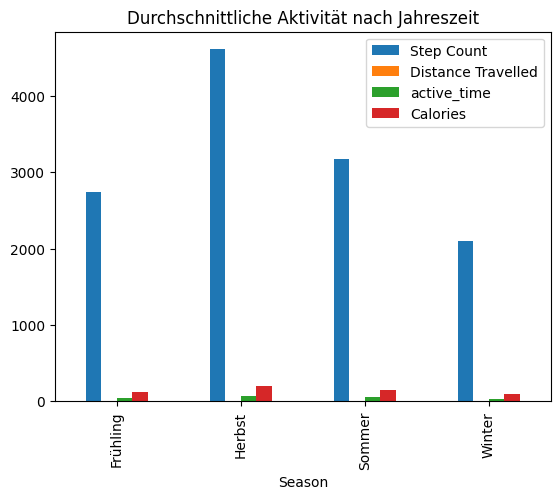

In [67]:
# Visualisierung
seasonal_avg.plot(kind='bar', title='Durchschnittliche Aktivität nach Jahreszeit')
plt.show()

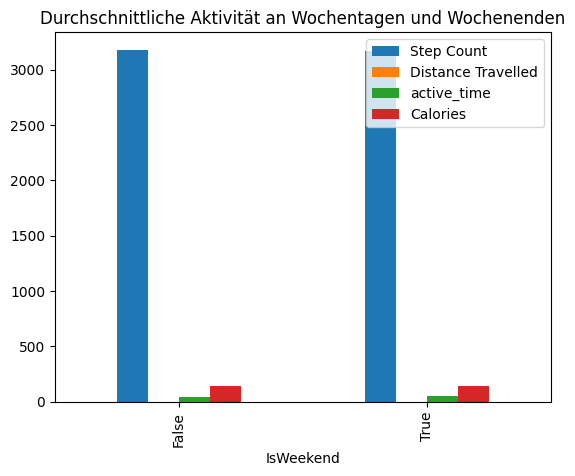

In [68]:
weekday_avg.plot(kind='bar', title='Durchschnittliche Aktivität an Wochentagen und Wochenenden')
plt.show()